In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dropout, BatchNormalization

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
lables = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

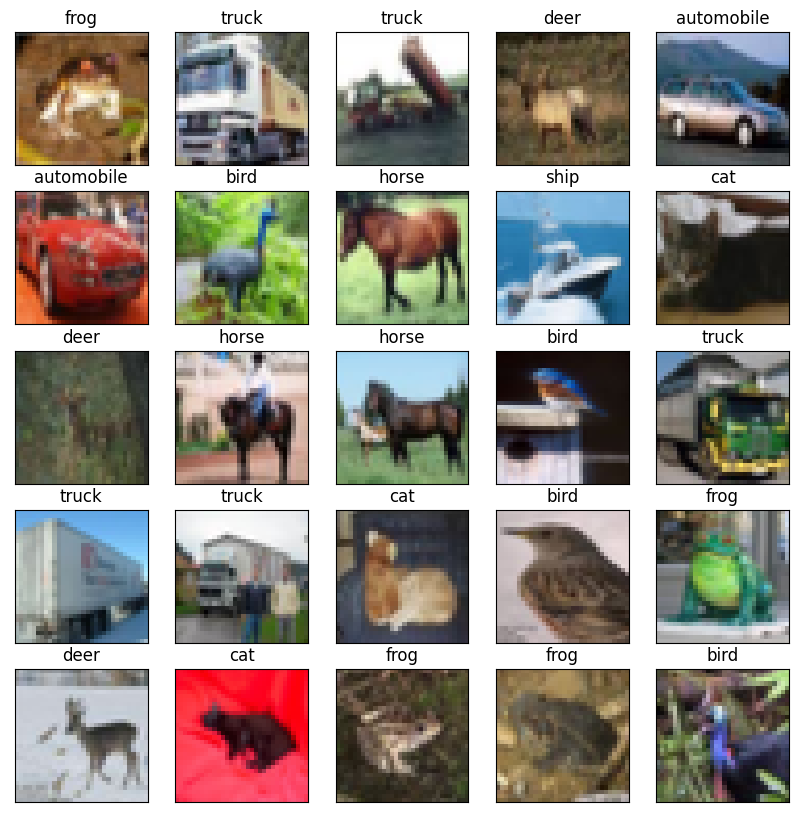

In [4]:
w, h = 5, 5
fig, ax = plt.subplots(w, h, figsize=(10, 10))

for i in range(w * h):
    ax_loc = ax[i//w, i%h]
    ax_loc.imshow(x_train[i])
    ax_loc.set_title(lables[y_train[i][0]])
    ax_loc.set_xticks([])
    ax_loc.set_yticks([])    

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(24, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(strides=2),
    Dropout(.5),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.Conv2D(48, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(strides=2),
    Dropout(.4),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    Dropout(.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 24)        3480      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 24)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 24)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        6944      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 48)        13872     
                                                        

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_split=.2, batch_size=32, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 17s 8ms/step - loss: 1.6649 - accuracy: 0.3925 - val_loss: 1.6138 - val_accuracy: 0.4411
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3095 - accuracy: 0.5297 - val_loss: 1.1477 - val_accuracy: 0.5902
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1687 - accuracy: 0.5852 - val_loss: 1.0008 - val_accuracy: 0.6455
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0694 - accuracy: 0.6222 - val_loss: 0.8900 - val_accuracy: 0.6873
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9876 - accuracy: 0.6540 - val_loss: 0.9315 - val_accuracy: 0.6722
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9360 - accuracy: 0.6731 - val_loss: 0.8485 - val_accuracy: 0.7041
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8873 - accuracy: 0.6864 - val_loss: 0.7904 - val_ac

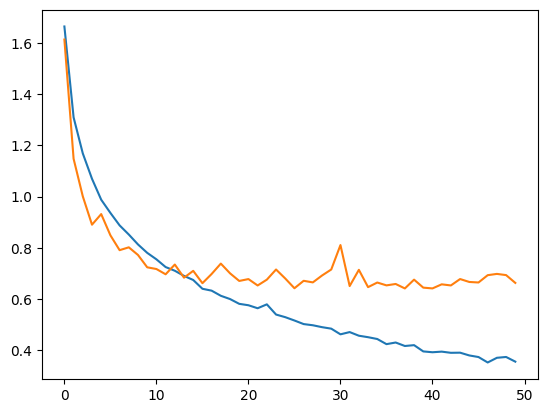

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

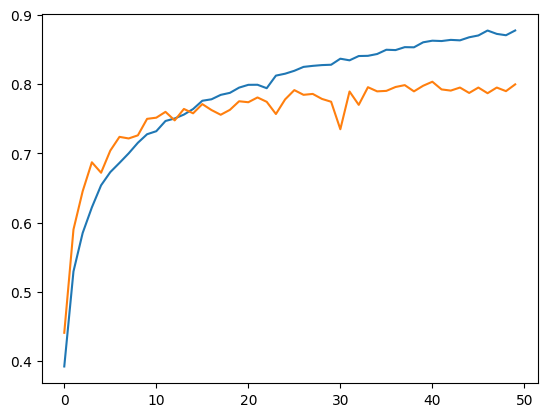

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [13]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
num = 0
y_test_softmax = np.argmax(y_test, axis=1)
for i, y_pred in enumerate(np.argmax(y_pred, axis=1)):
    if y_pred != y_test_softmax[i]:
        num += 1

In [15]:
1 - (num / 10_000)

0.7919